/var/folders/l5/y_0n5y810953ttbhnxpkv0100000gn/T/ipykernel_47344/2241993053.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


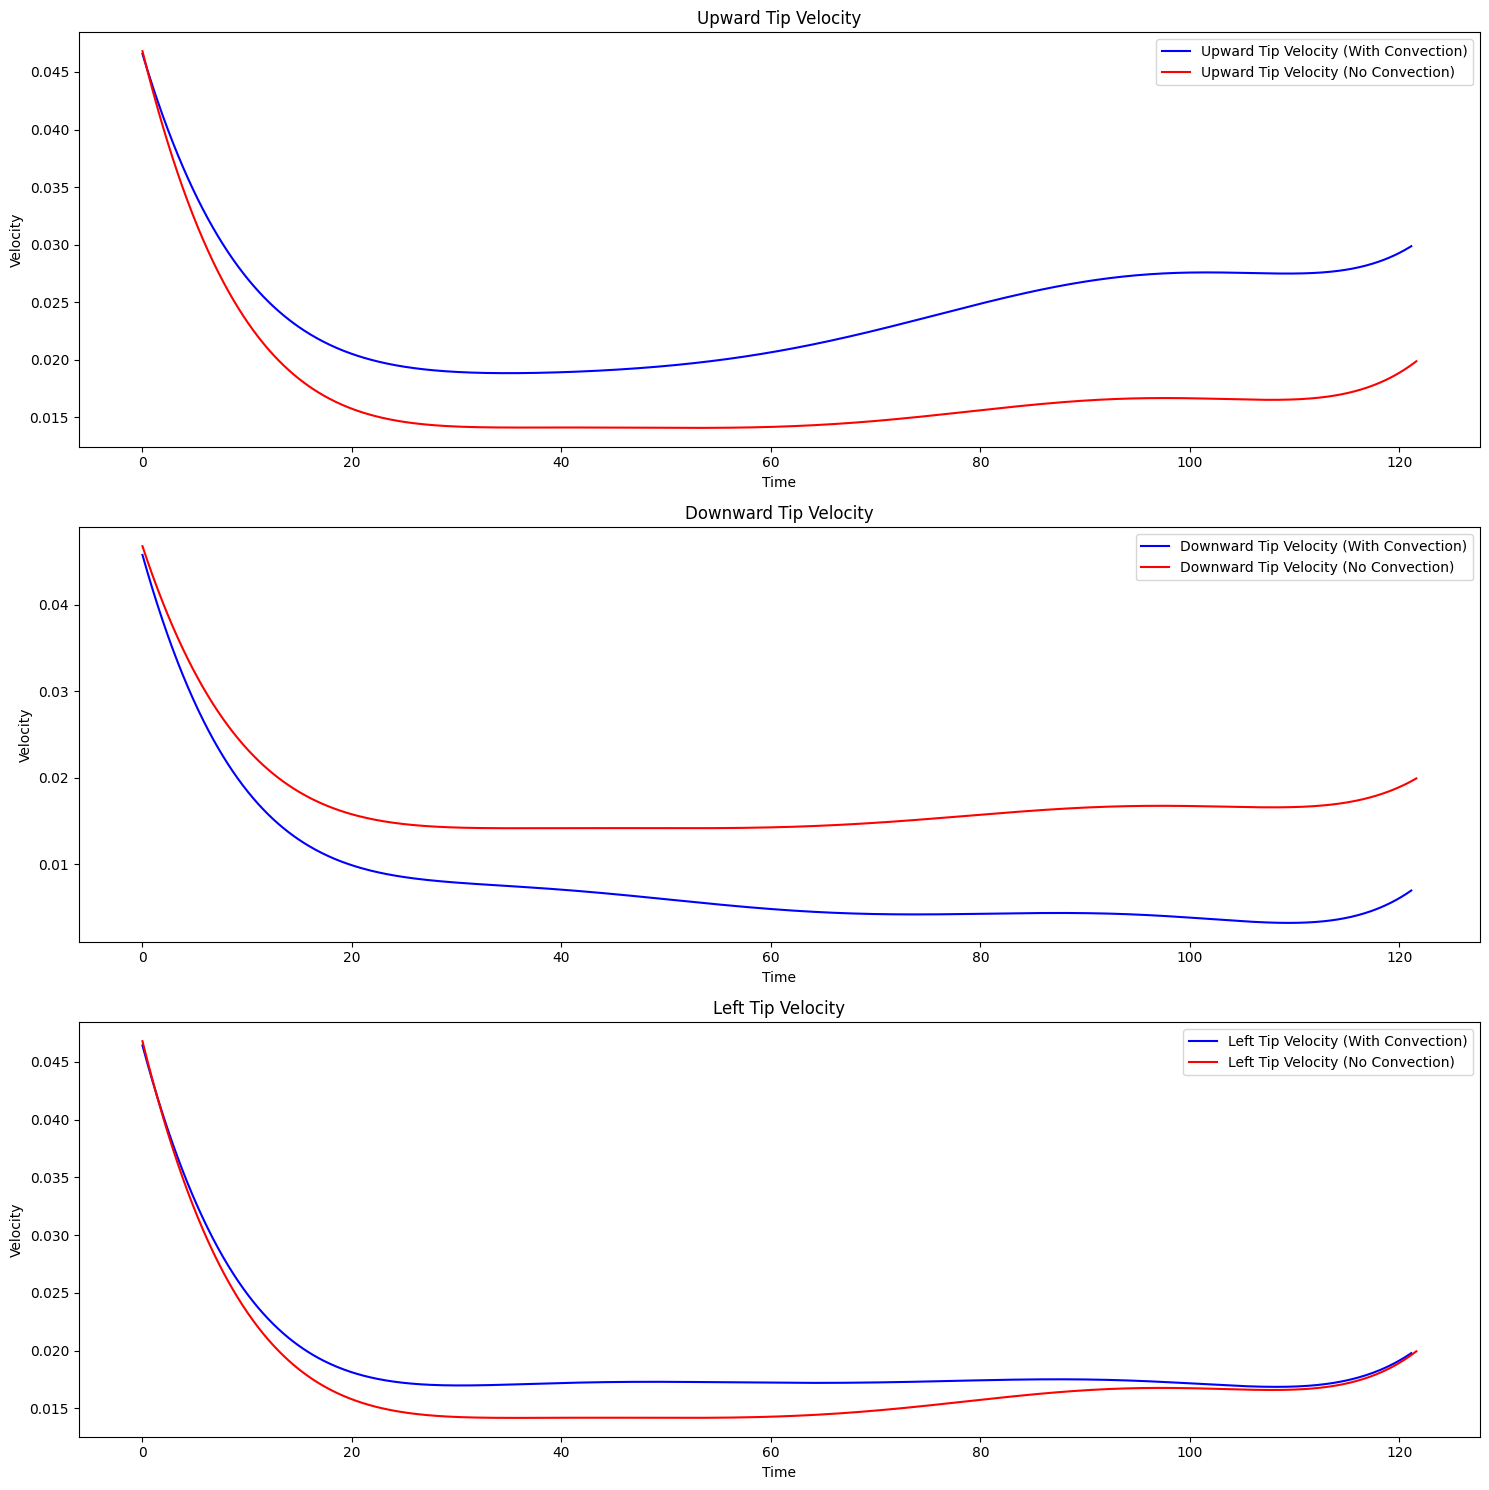

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

# Function to load and process data
def load_and_process_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()
    interface_data = data[data['Phi'] == 0]
    return interface_data

# Function to fit polynomial and calculate velocity
def calculate_velocity_polynomial(tip_data, direction, coordinate, degree=7):
    times = tip_data['Time'].to_numpy()
    positions = tip_data[coordinate].to_numpy()
    
    p = Polynomial.fit(times, positions, degree)
    dp = p.deriv()
    velocities = dp(times)
    tip_data['Velocity_' + direction] = velocities
    return tip_data

# Load and process both datasets
file_path_with_convection = "/Users/mahdipashaei/Desktop/karma_convection_data/with_Convection_contours.csv"
file_path_no_convection = "/Users/mahdipashaei/Desktop/karma_convection_data/No_Convection_Countors.csv"

data_with_convection = load_and_process_data(file_path_with_convection)
data_no_convection = load_and_process_data(file_path_no_convection)

# Find the tip of the solid in different directions
def find_tips(interface_data):
    upward_tip = interface_data.loc[interface_data.groupby('Time')['Points:1'].idxmax()]
    downward_tip = interface_data.loc[interface_data.groupby('Time')['Points:1'].idxmin()]
    left_tip = interface_data.loc[interface_data.groupby('Time')['Points:0'].idxmin()]
    return upward_tip, downward_tip, left_tip

upward_tip_with_convection, downward_tip_with_convection, left_tip_with_convection = find_tips(data_with_convection)
upward_tip_no_convection, downward_tip_no_convection, left_tip_no_convection = find_tips(data_no_convection)

# Calculate velocities for both datasets
upward_tip_velocity_with_convection = calculate_velocity_polynomial(upward_tip_with_convection, 'upward', 'Points:1')
downward_tip_velocity_with_convection = calculate_velocity_polynomial(downward_tip_with_convection, 'downward', 'Points:1')
left_tip_velocity_with_convection = calculate_velocity_polynomial(left_tip_with_convection, 'left', 'Points:0')

upward_tip_velocity_no_convection = calculate_velocity_polynomial(upward_tip_no_convection, 'upward', 'Points:1')
downward_tip_velocity_no_convection = calculate_velocity_polynomial(downward_tip_no_convection, 'downward', 'Points:1')
left_tip_velocity_no_convection = calculate_velocity_polynomial(left_tip_no_convection, 'left', 'Points:0')

# Apply conversion factor
conversion_factor = 30.59273977746351
upward_tip_velocity_with_convection['Velocity_upward'] = upward_tip_velocity_with_convection['Velocity_upward'].abs() / conversion_factor
downward_tip_velocity_with_convection['Velocity_downward'] = downward_tip_velocity_with_convection['Velocity_downward'].abs() / conversion_factor
left_tip_velocity_with_convection['Velocity_left'] = left_tip_velocity_with_convection['Velocity_left'].abs() / conversion_factor

upward_tip_velocity_no_convection['Velocity_upward'] = upward_tip_velocity_no_convection['Velocity_upward'].abs() / conversion_factor
downward_tip_velocity_no_convection['Velocity_downward'] = downward_tip_velocity_no_convection['Velocity_downward'].abs() / conversion_factor
left_tip_velocity_no_convection['Velocity_left'] = left_tip_velocity_no_convection['Velocity_left'].abs() / conversion_factor

# Plotting
plt.figure(figsize=(15, 15))

# Upward tip velocity
plt.subplot(3, 1, 1)
plt.plot(upward_tip_velocity_with_convection['Time'], upward_tip_velocity_with_convection['Velocity_upward'], label='Upward Tip Velocity (With Convection)', color='blue')
plt.plot(upward_tip_velocity_no_convection['Time'], upward_tip_velocity_no_convection['Velocity_upward'], label='Upward Tip Velocity (No Convection)', color='red')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Upward Tip Velocity')
plt.legend()

# Downward tip velocity
plt.subplot(3, 1, 2)
plt.plot(downward_tip_velocity_with_convection['Time'], downward_tip_velocity_with_convection['Velocity_downward'], label='Downward Tip Velocity (With Convection)', color='blue')
plt.plot(downward_tip_velocity_no_convection['Time'], downward_tip_velocity_no_convection['Velocity_downward'], label='Downward Tip Velocity (No Convection)', color='red')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Downward Tip Velocity')
plt.legend()

# Left tip velocity
plt.subplot(3, 1, 3)
plt.plot(left_tip_velocity_with_convection['Time'], left_tip_velocity_with_convection['Velocity_left'], label='Left Tip Velocity (With Convection)', color='blue')
plt.plot(left_tip_velocity_no_convection['Time'], left_tip_velocity_no_convection['Velocity_left'], label='Left Tip Velocity (No Convection)', color='red')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Left Tip Velocity')
plt.legend()

plt.tight_layout()
plt.show()


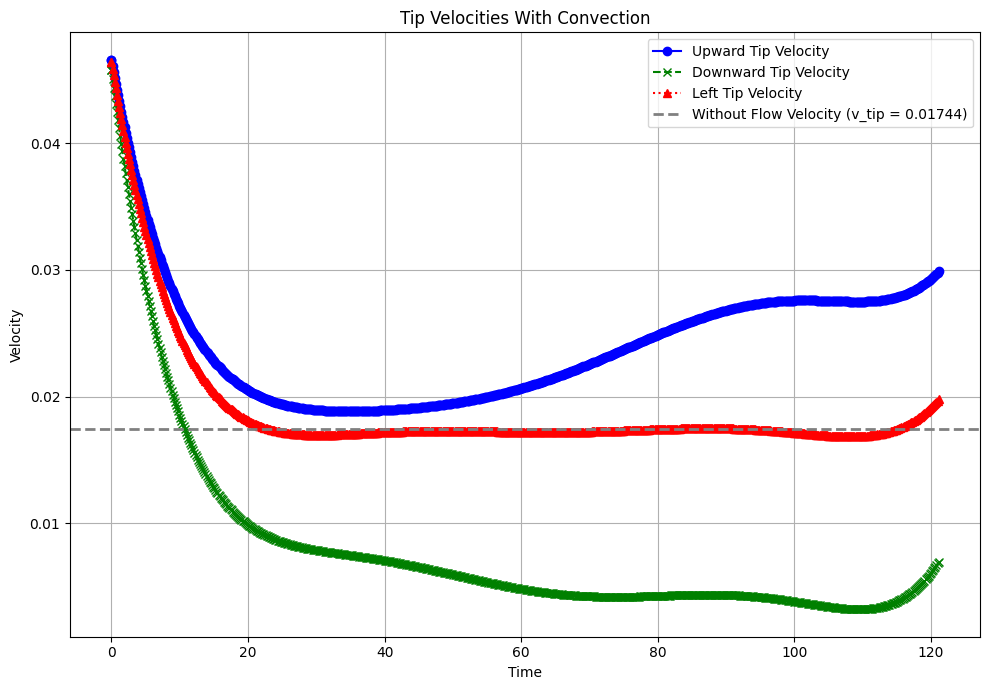

In [4]:
# Plotting all three velocities with convection in one plot
plt.figure(figsize=(10, 7))

# Plotting upward tip velocity with convection
plt.plot(upward_tip_velocity_with_convection['Time'], upward_tip_velocity_with_convection['Velocity_upward'], label='Upward Tip Velocity', color='blue', marker='o', linestyle='-')

# Plotting downward tip velocity with convection
plt.plot(downward_tip_velocity_with_convection['Time'], downward_tip_velocity_with_convection['Velocity_downward'], label='Downward Tip Velocity', color='green', marker='x', linestyle='--')

# Plotting left tip velocity with convection
plt.plot(left_tip_velocity_with_convection['Time'], left_tip_velocity_with_convection['Velocity_left'], label='Left Tip Velocity', color='red', marker='^', linestyle=':')

# Adding a horizontal line at v_tip = 0.01744
plt.axhline(y=0.01744, color='gray', linestyle='--', linewidth=2, label='Without Flow Velocity (v_tip = 0.01744)')

plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Tip Velocities With Convection')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()